In [32]:
!pip install face_recognition -q

In [33]:
import face_recognition
import matplotlib.pyplot as plt
from PIL import ImageDraw, Image
from IPython.display import display
import cv2
import numpy as np
%matplotlib inline

# 画像を読み込む。
img = face_recognition.load_image_file("face.jpeg")

### 顔検出してみる

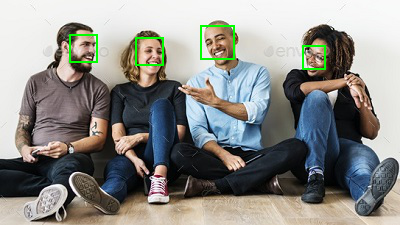

In [23]:
# 画像から顔の領域を検出する。
face_locs = face_recognition.face_locations(img, model="cnn", number_of_times_to_upsample=2)

def draw_faces(img, locs):
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img, mode="RGBA")

    for top, right, bottom, left in locs:
        draw.rectangle((left, top, right, bottom), outline="lime", width=2)

    display(img)


draw_faces(img, face_locs)

### 画像から顔を切り抜いて笑顔を検出し、定量化してみる

In [51]:
# capture = cv2.VideoCapture(0)
# capture.set(3,640)# 320 320 640 720
# capture.set(4,480)#180 240  360 405

face_cascade = cv2.CascadeClassifier('opencv/data/haarcascades/haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('opencv/data/haarcascades/haarcascade_smile.xml')
img = face_recognition.load_image_file("face.jpeg")

# 動画用
# while True:
# img = cv2.imread('face.jpeg')
# ret, img = capture.read()
# img = cv2.flip(img,1)#鏡表示にするため．

def show_laghness_score(img):
    face_locs = face_recognition.face_locations(img, model="cnn", number_of_times_to_upsample=2)
    draw_faces(img, face_locs)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(10,10))
    score = 0
    for ( top, right, bottom, left) in face_locs:
    # for x,y,w,h in faces:
        x,y,w,h=left,top, (right-left), (bottom-top)
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2) # blue
        #Gray画像から，顔領域を切り出す．
    #     roi_gray = gray[y:y+h, x:x+w] 
        roi_gray = gray[top:bottom, left:right] 

        #サイズを縮小
        roi_gray = cv2.resize(roi_gray,(100,100))

         # 輝度で規格化
        lmin = roi_gray.min() #輝度の最小値
        lmax = roi_gray.max() #輝度の最大値
        for index1, item1 in enumerate(roi_gray):
            for index2, item2 in enumerate(item1) :
                roi_gray[index1][index2] = int((item2 - lmin) / (lmax-lmin) * item2)
        #cv2.imshow("roi_gray2",roi_gray)  #輝度を正規化した画像を表示

        smiles= smile_cascade.detectMultiScale(roi_gray, scaleFactor= 1.1, minNeighbors=1, minSize=(20, 20))#笑顔識別
        if len(smiles) >0 : # 笑顔領域がなければ以下の処理を飛ばす．#if len(smiles) <=0 : continue でもよい．その場合以下はインデント不要
            # サイズを考慮した笑顔認識
            smile_neighbors = len(smiles)
            #print("smile_neighbors=",smile_neighbors) #確認のため認識した近傍矩形数を出力
            LV = 2/100
            intensityZeroOne = smile_neighbors  * LV 
            if intensityZeroOne > 1.0: intensityZeroOne = 1.0
            score += intensityZeroOne/len(face_locs)
            #print(intensityZeroOne) #確認のため強度を出力
            for(sx,sy,sw,sh) in smiles:
                cv2.circle(img,(int(x+(sx+sw/2)*w/100),int(y+(sy+sh/2)*h/100)),int(sw/2*w/100), (255*(1.0-intensityZeroOne), 0, 255*intensityZeroOne),2)#red
    plt.imshow(img)
    plt.show()
    return round(score,2)

# plt.imshow(img)
# cv2.imshow('img.png',img)
# plt.imshow(img)
# key Operation
# key=cv2.waitKey(5) 
# if key ==27 or key ==ord('q'): #escまたはeキーで終了
#     break
# capture.release()
# cv2.destroyAllWindows()
# print("Exit") 

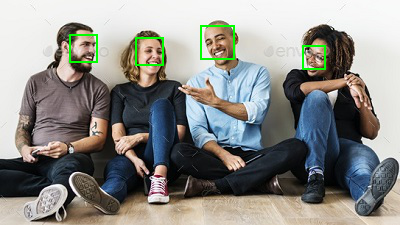

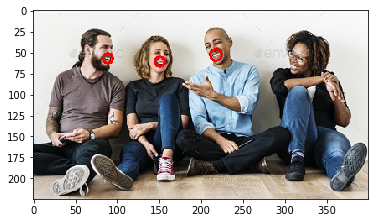

score: 0.01


In [52]:
img = face_recognition.load_image_file("face.jpeg")
score = show_laghness_score(img)
print(f"score: {score}")

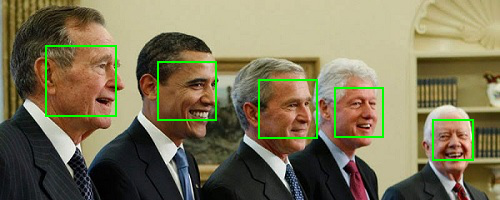

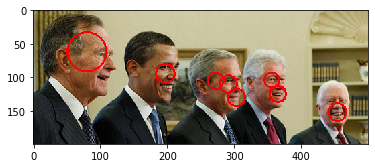

score: 0.03


In [53]:
img = face_recognition.load_image_file("face2.jpeg")
score = show_laghness_score(img)
print(f"score: {score}")

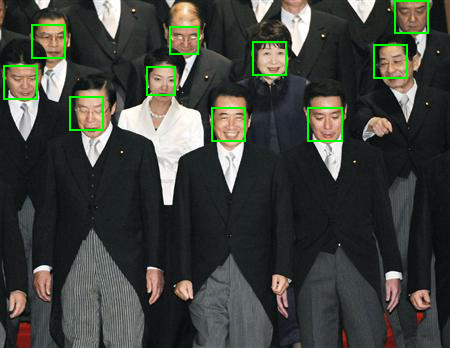

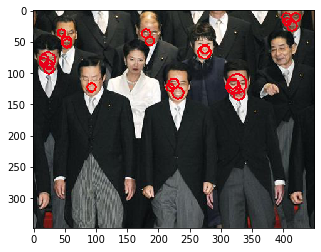

score: 0.05


In [54]:
img = face_recognition.load_image_file("face3.jpeg")
score = show_laghness_score(img)
print(f"score: {score}")